### Sementic segmentation

In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(578, 580, 3)


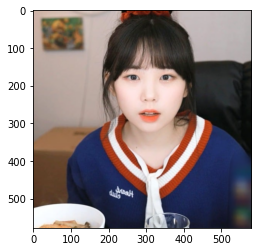

In [154]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/friendship.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [155]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f042de69d90>)

In [156]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [157]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [158]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [159]:
segvalues

{'class_ids': array([ 0,  9, 11, 15, 18]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [160]:
segvalues['masks']

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [161]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
diningtable
person
sofa


In [162]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [163]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [164]:
seg_color = (128,128,192)

(578, 580)


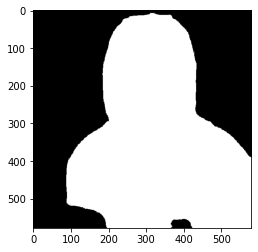

In [165]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

In [166]:
seg_map

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

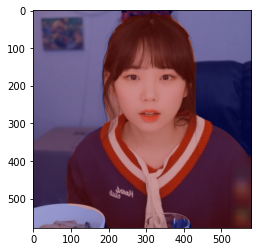

In [167]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

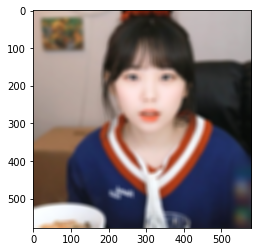

In [168]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

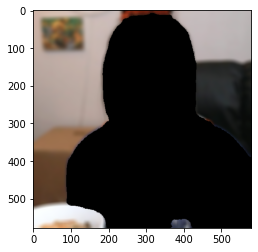

In [169]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

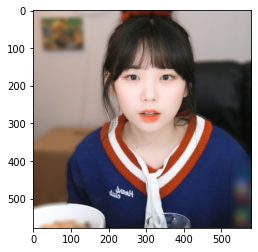

In [170]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

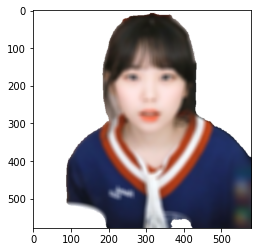

In [171]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_or(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

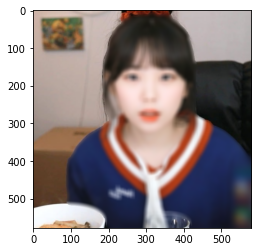

In [172]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color!=255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### Model combined

In [145]:
def Img_seg(input_image = 'friendship.png' , background_image = None , backgound_blur = False, focus = 'foreground', blurry_coefficient = 0.4):
    
    img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/' +  input_image
    img_orig = np.array(cv2.imread(img_path)) 
    img_size = img_orig.shape[0:2]
    
    if background_image is not None:
        back_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/' +  background_image
        img_back = cv2.imread(back_path) 
        img_back = cv2.resize(img_back, (img_size[1],img_size[0]))

    segvalues, output = model.segmentAsPascalvoc(img_path)
    label_list = []
    for class_id in segvalues['class_ids']:
        label_list.append(LABEL_NAMES[class_id])
        
    seg_color = (128,128,192)
    seg_map = np.all(output==seg_color, axis=-1)
    img_show = img_orig.copy()
    img_mask = seg_map.astype(np.uint8) * 255
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
    
    img_show = cv2.addWeighted(img_show, 1-blurry_coefficient , color_mask, blurry_coefficient, 0.0)

    img_orig_blur = cv2.blur(img_orig, (13,13))
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    
    if focus == 'foreground' and background_image is None:
        img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
        img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
    elif focus != 'foreground' and background_image is None :
        img_bg_blur = cv2.bitwise_or(img_orig_blur, img_bg_mask)
        img_concat = np.where(img_mask_color!=255, img_orig, img_bg_blur)
        
    if background_image is not None:
        if backgound_blur == False:
            img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
            img_concat = np.where(img_mask_color==255, img_orig, img_back)
        else :
            img_back = cv2.blur(img_back, (13,13))
            img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
            img_concat = np.where(img_mask_color==255, img_orig, img_back)
        
    return cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB), label_list

### Various variation( Back ground, Blur, foreground or background)
#### Friendship ~ing

In [107]:
a , b= Img_seg(focus = 'background')

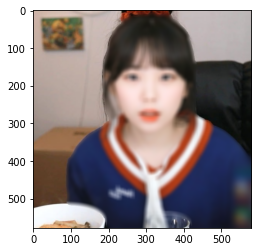

In [108]:
plt.imshow(a)
plt.show()

In [113]:
a , b= Img_seg(focus = 'foreground')

good


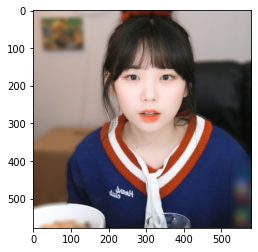

In [114]:
plt.imshow(a)
plt.show()

In [115]:
a , b= Img_seg(background_image = 'back.jpg')

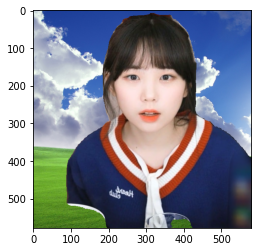

In [116]:
plt.imshow(a)
plt.show()

In [146]:
a , b= Img_seg(background_image = 'back.jpg', backgound_blur = True)

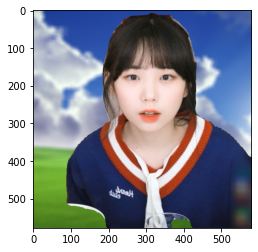

In [120]:
plt.imshow(a)
plt.show()

### Problem
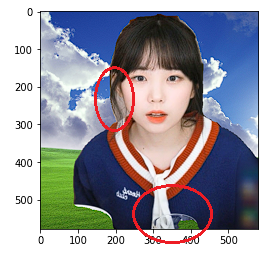

완벽하게 segmentation 해내지 못했다

## Animal(Do not saying his name)

In [148]:
a , b= Img_seg(input_image = 'not_saying_his_name.jpg' , focus = 'foreground')

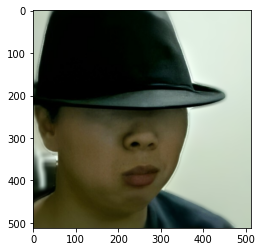

In [149]:
plt.imshow(a)
plt.show()

In [150]:
a , b= Img_seg(input_image = 'not_saying_his_name.jpg' ,background_image='mg.jpg', focus = 'foreground')

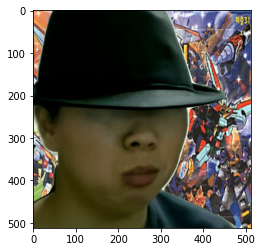

In [151]:
plt.imshow(a)
plt.show()

## R.I.P Double DDabong Mars men

In [175]:
a , b= Img_seg(input_image = 'musk.jpg' ,background_image='gogogo!!.jpg', focus = 'foreground',backgound_blur = True)

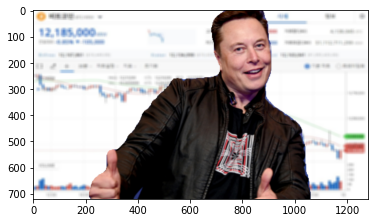

In [176]:
plt.imshow(a)
plt.show()

### 신에게 가려진 화성 쌍따봉맨

In [177]:
a , b= Img_seg(input_image = 'not_saying_his_name.jpg' ,background_image='musk.jpg', focus = 'foreground',backgound_blur = False)

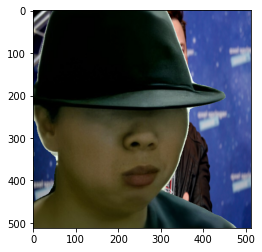

In [178]:
plt.imshow(a)
plt.show()

# For better segmentation

## Data handling and Preprocessing
- Semantic segmentation 모델을 학습하기 전에 데이터를 정제하고 전처리하는 과정이 중요합니다. 이 과정에서 잘못 라벨링된 데이터를 제거하고, 불필요한 잡음이나 오류를 감소시킬 수 있는 방법을 사용해야 합니다. 예를 들어, 불분명한 경계 또는 모호한 영역을 가진 이미지에 대해 추가적인 주석을 추가하거나, 이미지를 회전, 확대 또는 반전하는 등의 데이터 확장 기법을 사용할 수 있습니다.

## Using better model architecture

- 다양한 모델 아키텍처 시도: 성능이 낮은 모델 아키텍처를 사용하는 경우, 다른 아키텍처를 시도해볼 필요가 있습니다. 최신의 심층 합성곱 신경망 (deep convolutional neural network) 아키텍처, 예를 들어 U-Net, SegNet, DeepLab 등을 사용하여 모델을 구성할 수 있습니다. 이러한 아키텍처는 잘 정의된 특성 추출과 세분화된 예측을 가능하게 해줍니다

## Transfer learning

- 대규모 데이터셋에서 사전에 학습된 모델을 사용하여 전이 학습을 수행하는 것은 성능 향상에 도움이 될 수 있습니다. 이미지넷(ImageNet)과 같은 대규모 데이터셋에서 학습된 모델을 사용하거나, 유사한 작업을 수행한 데이터셋에서 학습한 모델을 사용하는 것이 일반적입니다. 이렇게 함으로써 모델은 초기 학습 단계에서 일반적인 시각적 특징을 학습하고, 적은 양의 데이터로도 성능을 향상시킬 수 있습니다.

## High quality ground truth label

### Nosing based learning
- https://arxiv.org/abs/2010.02502

### 3D modeling or Using heatmap image data
 - https://ai.googleblog.com/2020/04/udepth-real-time-3d-depth-sensing-on.html